# EDA-Yelp

En el siguiente análisis exploratorio de datos se llevará a cabo la comparación y correlación de variables, utilizando como fuente los datos obtenidos por medio de la aplicación Yelp. Se abordará el marco contextual de los restaurantes de comida mexicanas en el estado de Florida, EEUU., dentro del marco temporal comprendido entre principios de 2017 a finales de 2021 y, a su vez, se focalizará en la cadena de restaurantes Taco Bell para estudiar su posición en el mercado respecto de sus competidores.

### Librerías.

In [1]:
import pandas as pd
# Se configura pandas para que se muestre la totalidad de las columnas del dataframe.
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Rutas.

In [2]:
path_yelp =pd.read_parquet('C:\\Users\\fedez\\OneDrive\\Escritorio\\ProyectoG4-Google_Yelp\\Data\\Raw\\Yelp!_final.parquet')
path_business = pd.read_parquet('C:\\Users\\fedez\\OneDrive\\Escritorio\\ProyectoG4-Google_Yelp\\Data\\Parquet\\business.parquet')
path_review = pd.read_parquet('C:\\Users\\fedez\\OneDrive\\Escritorio\\ProyectoG4-Google_Yelp\\Data\\Parquet\\review.parquet')
path_user = pd.read_parquet('C:\\Users\\fedez\\OneDrive\\Escritorio\\ProyectoG4-Google_Yelp\\Data\\Parquet\\user.parquet')

### Dataframes.

In [3]:
df_yelp = pd.DataFrame(path_yelp)
df_business = pd.DataFrame(path_business)
df_review = pd.DataFrame(path_review)
df_user = pd.DataFrame(path_user)

In [4]:
df_yelp.head(1)

,business_id,name,city,state,latitude,longitude,stars business,restaurant review count,Lunes horarios,Martes horarios,Miércoles horarios,Jueves horarios,Viernes horarios,Sábado horarios,Domingo horarios,review_id,user_id,stars review,text,fecha review,hora entera review,dia review,user review count,avg user stars
0,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,Florida,27.894167,-82.779866,3.0,19,0:0-0:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,ZnBdH4Z-0GlRUzD48ddv-g,3a3af83Efpx6I921Zwuwbw,4.0,The New Chipotle Mexican Grill conveniently lo...,2017-08-30,10.0,Miércoles,112.0,4.48


## Marco general.

### Correlación de variables.

Matríz de correlación de "df_yelp".

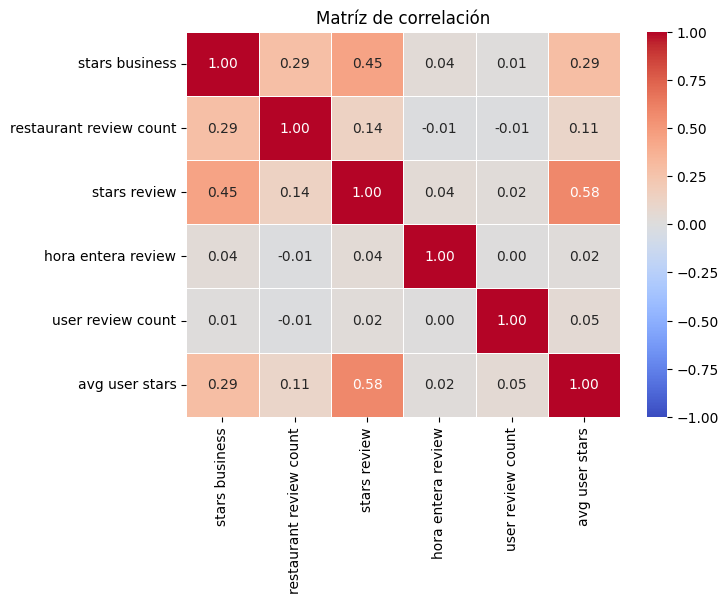

In [5]:
correlation_matrix = df_yelp[['stars business', 'restaurant review count', 'stars review', 'hora entera review', 'user review count', 'avg user stars']].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(7, 5))

# Generar la matriz de correlación utilizando heatmap de seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=.5)

# Configurar título
plt.title('Matríz de correlación')

# Mostrar la matriz de correlación
plt.show()

### Correlación entre "stars business", "stars review" y "avg user stars"

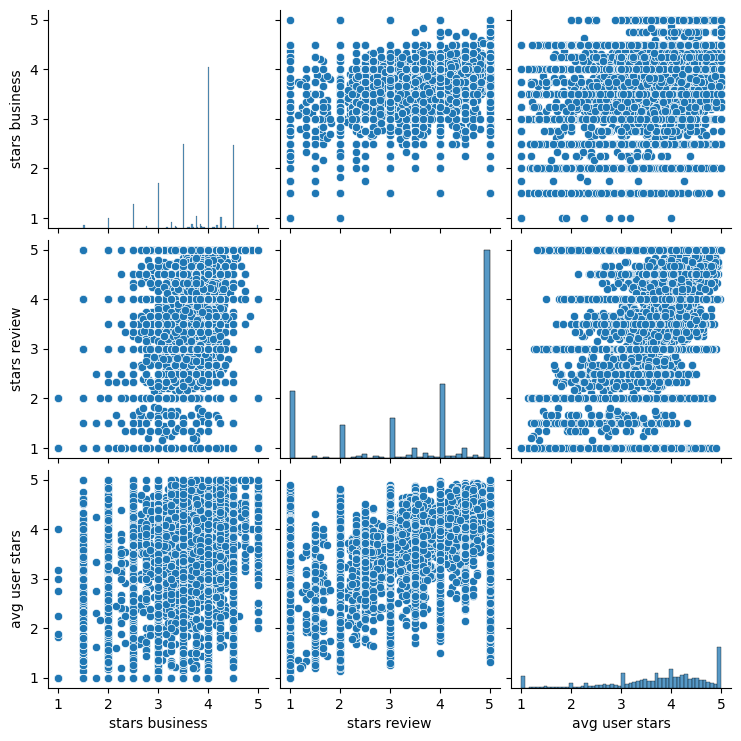

In [6]:
df_grouped = df_yelp.groupby('user_id').agg({
    'stars business': 'mean',
    'stars review': 'mean',
    'avg user stars': 'mean'
}).reset_index()

# Crear el pairplot
sns.pairplot(df_grouped[['stars business', 'stars review', 'avg user stars']])
plt.show()


### Correlación entre "useful" y "user review count".

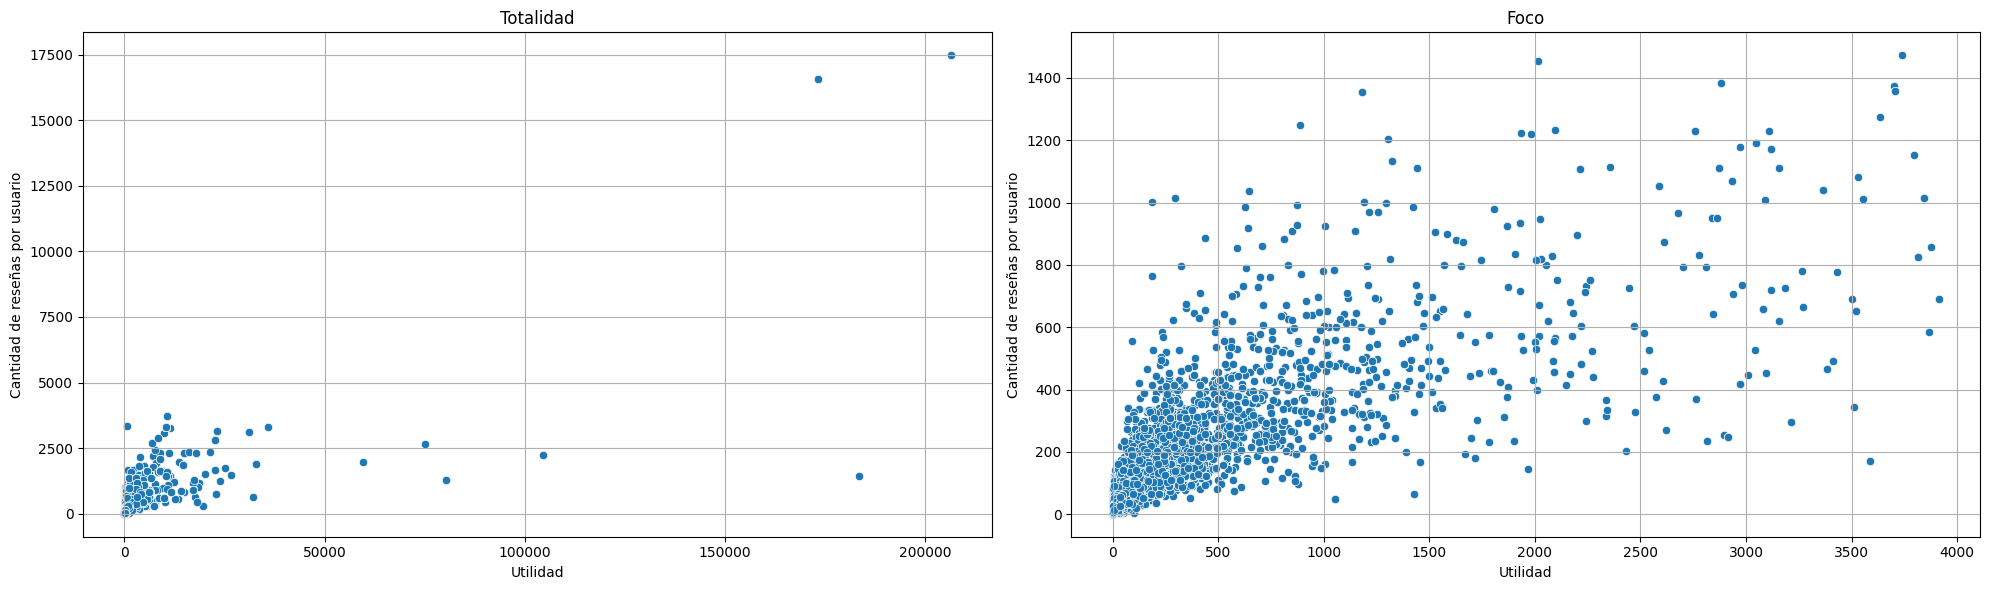

In [7]:
df_filtered = df_yelp[(df_yelp['useful'] <= 4000) & (df_yelp['user review count'] <= 1500)]

# Crear la figura y los ejes para los dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico original
sns.scatterplot(data=df_yelp, x='useful', y='user review count', ax=axes[0])
axes[0].set_title('Totalidad')
axes[0].set_xlabel('Utilidad')
axes[0].set_ylabel('Cantidad de reseñas por usuario')
axes[0].grid(True)

# Gráfico filtrado
sns.scatterplot(data=df_filtered, x='useful', y='user review count', ax=axes[1])
axes[1].set_title('Foco')
axes[1].set_xlabel('Utilidad')
axes[1].set_ylabel('Cantidad de reseñas por usuario')
axes[1].grid(True)

# Ajustar el diseño para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()

En este grafico de dispersión se puede distinguir que la relación entre las variables de la calidad de utilidad de las reseñas es directamente proporcional a la cantidad de reseñas que tienen los usuarios

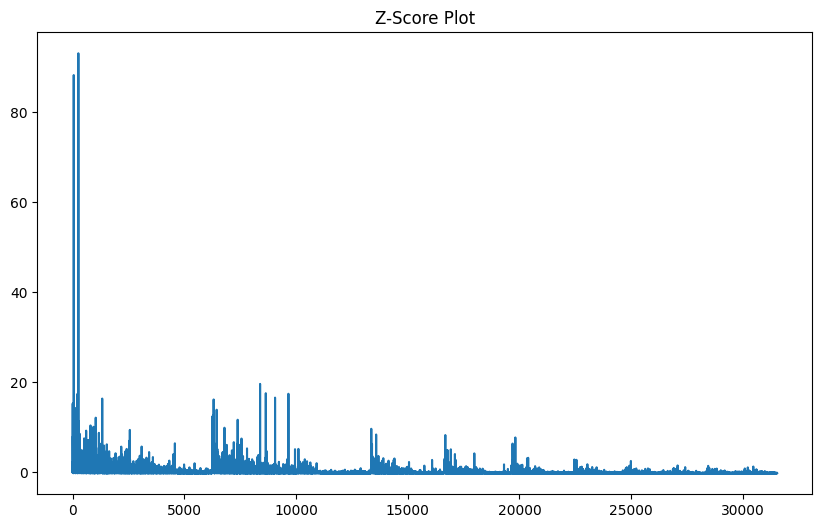

In [8]:
from scipy.stats import zscore
plt.figure(figsize=(10, 6))
z_scores = zscore(df_user['user review count'])
plt.plot(z_scores)
plt.title('Z-Score Plot')
plt.show()

### Restaurantes con mayor flujo de reseñas

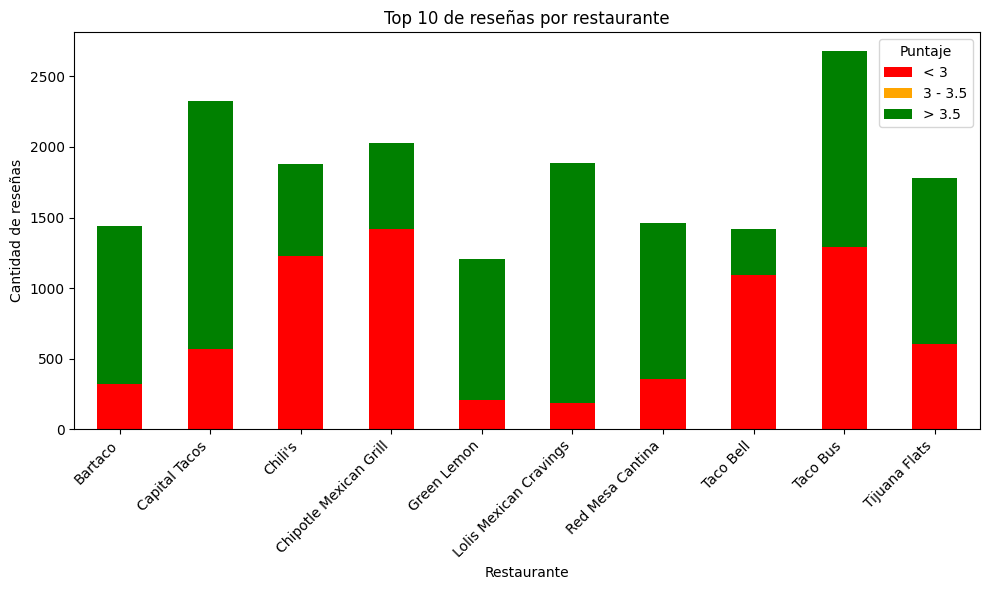

In [9]:
top_10_names = df_yelp['name'].value_counts().nlargest(10).index

# Filtrar el DataFrame original por los top 10 nombres
df_filtered = df_yelp[df_yelp['name'].isin(top_10_names)].copy()

# Crear una columna para categorizar las reseñas.
df_filtered.loc[:, 'category'] = pd.cut(df_filtered['stars review'], bins=[0, 3, 3.5, 5], labels=['< 3', '3 - 3.5', '> 3.5'])

# Agrupar y contar las reseñas en cada categoría, especificando observed=False
count_reviews = df_filtered.groupby(['name', 'category'], observed=False).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
count_reviews.plot(kind='bar', stacked=True, color=['red', 'orange', 'green'], figsize=(10, 6))

# Personalización del gráfico
plt.xlabel('Restaurante')
plt.ylabel('Cantidad de reseñas')
plt.title('Top 10 de reseñas por restaurante')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Puntaje')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Dentro de este histograma se puede ver que **Taco Bell** está posicionado dentro del *Top 10 de restaurantes mexicanos con mayor número de reseñas*, a su vez se nota una clara desventaja frente a sus competidores, ya que presenta casi un **80% de reseñas negativas** respecto del total, siendo uno de los restaurantes peor valorados del conjunto.

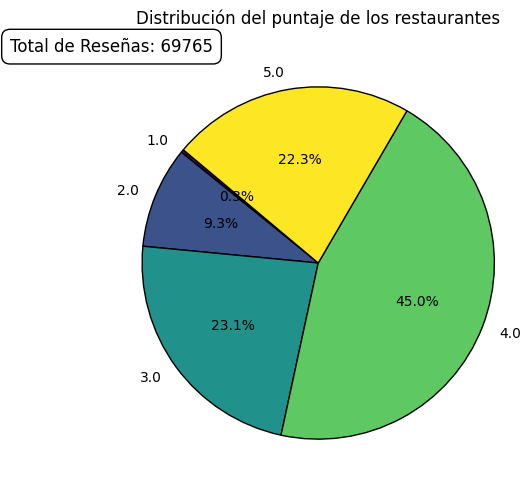

In [10]:
df_business['stars business'] = np.ceil(df_business['stars business'])

# Contar la cantidad de restaurantes para cada puntaje
puntaje_counts = df_business['stars business'].value_counts().sort_index()

# Obtener el número total de reseñas
total_reviews = df_business['restaurant review count'].sum()

# Crear una paleta de colores para cada fracción
colors = plt.cm.viridis(np.linspace(0, 1, len(puntaje_counts)))

# Crear el gráfico de pastel
plt.figure(figsize=(5, 6))
patches, texts, autotexts = plt.pie(puntaje_counts, labels=puntaje_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
                                    wedgeprops={'edgecolor': 'black'})  # Añadir contorno negro

# Personalizar los textos de porcentaje
for autotext in autotexts:
    autotext.set_color('black')  # Color de los textos de porcentaje

plt.title('Distribución del puntaje de los restaurantes')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo

# Añadir cuadro de texto con el número total de reseñas
plt.text(-1.75, 1.2, f'Total de Reseñas: {total_reviews}', fontsize=12, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

En este gráfico de torta podemos ver que el número de reseñas de la categoría de restaurantes mexicanos es **69.765 reseñas** en total. A su vez se distingue que la mayoría de los usuarios tiende a puntuar de manera **positiva** a los restaurantes, abarcando **67.3%** de reseñas igual o superiores a **4 estrellas**. Por otro lado, las **reseñas negativas** son una porción ampliamente minoritaria, manteniendo un **9.6%** de reseñas igual o inferiores a **2 estrellas**.

Gráfico de torta de Taco Bell.

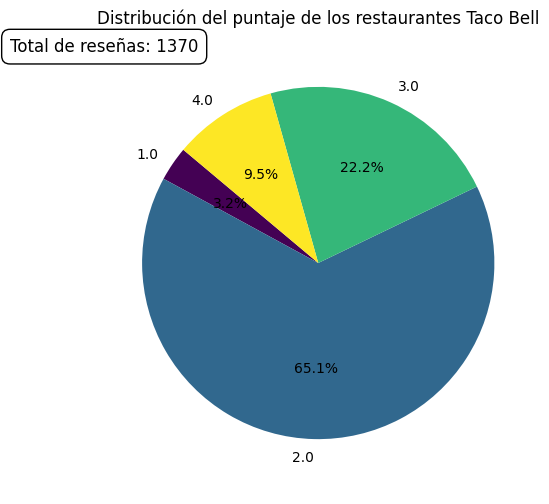

In [11]:
df_tacobell = df_business[df_business['name'] == 'Taco Bell'].copy()

# Redondear el puntaje hacia arriba
df_tacobell['stars business'] = np.ceil(df_tacobell['stars business'])

# Contar la cantidad de restaurantes para cada puntaje
puntaje_counts = df_tacobell['stars business'].value_counts().sort_index()

# Obtener el número total de reseñas
total_reviews = df_tacobell['restaurant review count'].sum()

# Crear una paleta de colores para cada fracción
colors = plt.cm.viridis(np.linspace(0, 1, len(puntaje_counts)))

# Crear el gráfico de pastel
plt.figure(figsize=(5, 6))
plt.pie(puntaje_counts, labels=puntaje_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución del puntaje de los restaurantes Taco Bell')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo

# Añadir cuadro de texto con el número total de reseñas
plt.text(-1.75, 1.2, f'Total de reseñas: {total_reviews}', fontsize=12, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()


En este gráfico de torta se observa que la cadena presenta un total de **1370 reseñas**, de las cuales hay un porcentaje nulo de reseñas mayores a **4 estrellas**, y un **65.1%** de estas alojándose dentor de la categoría de las **2 estrellas** y un **31.7%** siendo de **3 estrellas o superior**. Este gráfico contrasta de manera exagerada con el gráfico de torta anteriormente analizado, remarcando nuevamente la posición desventajosa que tiene la cadena **Taco Bell** respecto de sus competidores.

## Marco temporal

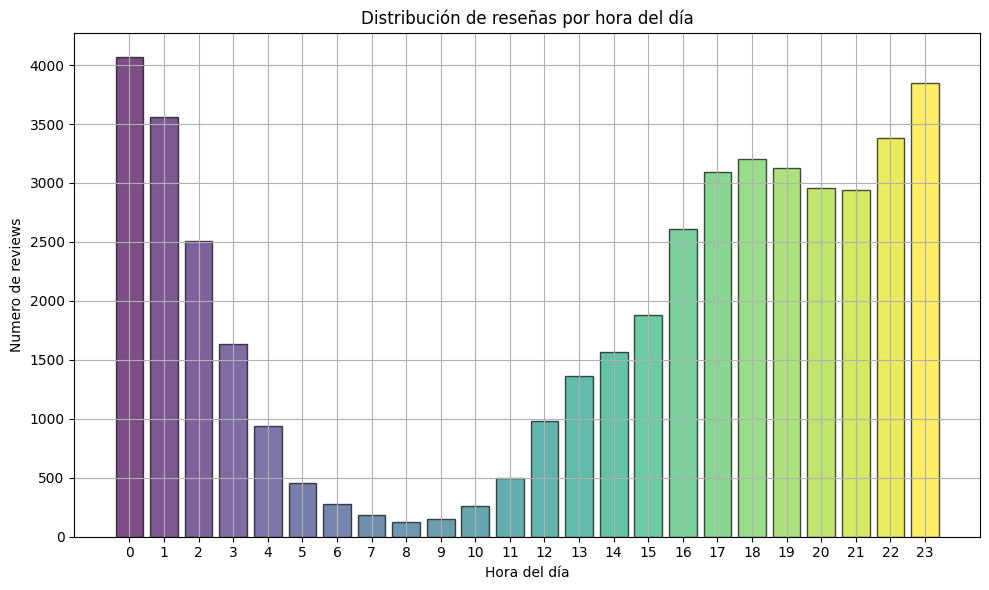

In [12]:
colors = plt.cm.viridis(np.linspace(0, 1, 24))  # 24 colores para cada hora del día

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(24), df_review['hora entera review'].value_counts().sort_index(), color=colors, edgecolor='black', alpha=0.7)

# Personalizar el gráfico
plt.xlabel('Hora del día')
plt.ylabel('Numero de reviews')
plt.title('Distribución de reseñas por hora del día')
plt.xticks(range(24))  # Establecer marcas en el eje x para cada hora
plt.grid(True)
plt.tight_layout()

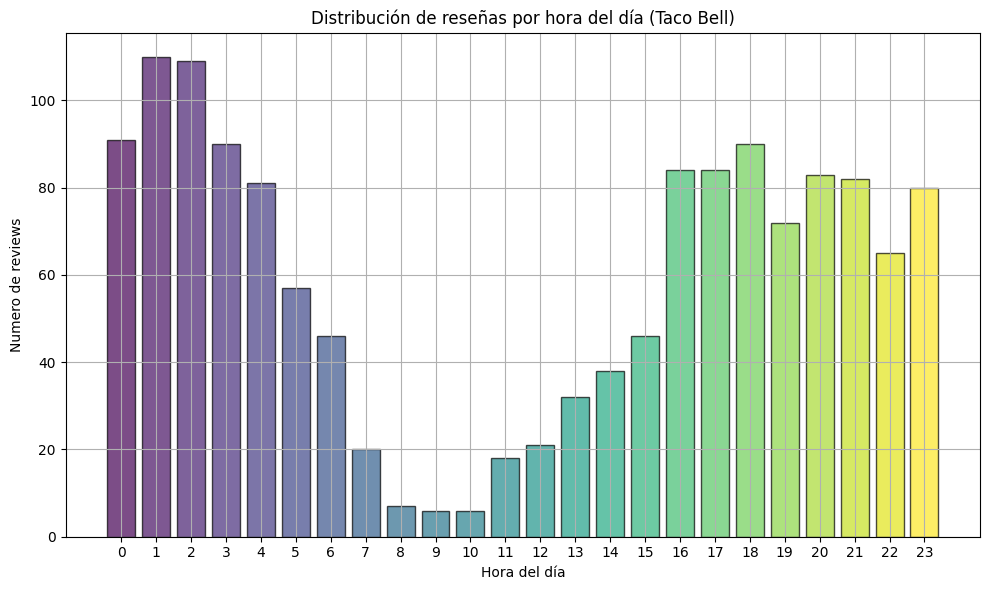

In [13]:
df_taco_bell = df_yelp[df_yelp['name'].str.contains('Taco Bell', case=False, na=False)]
colors = plt.cm.viridis(np.linspace(0, 1, 24))  # 24 colores para cada hora del día

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(24), df_taco_bell['hora entera review'].value_counts().sort_index(), color=colors, edgecolor='black', alpha=0.7)

# Personalizar el gráfico
plt.xlabel('Hora del día')
plt.ylabel('Numero de reviews')
plt.title('Distribución de reseñas por hora del día (Taco Bell)')
plt.xticks(range(24))  # Establecer marcas en el eje x para cada hora
plt.grid(True)
plt.tight_layout()

### Gráfico de líneas de la progresión mensual de las reseñas a lo largo de los años.

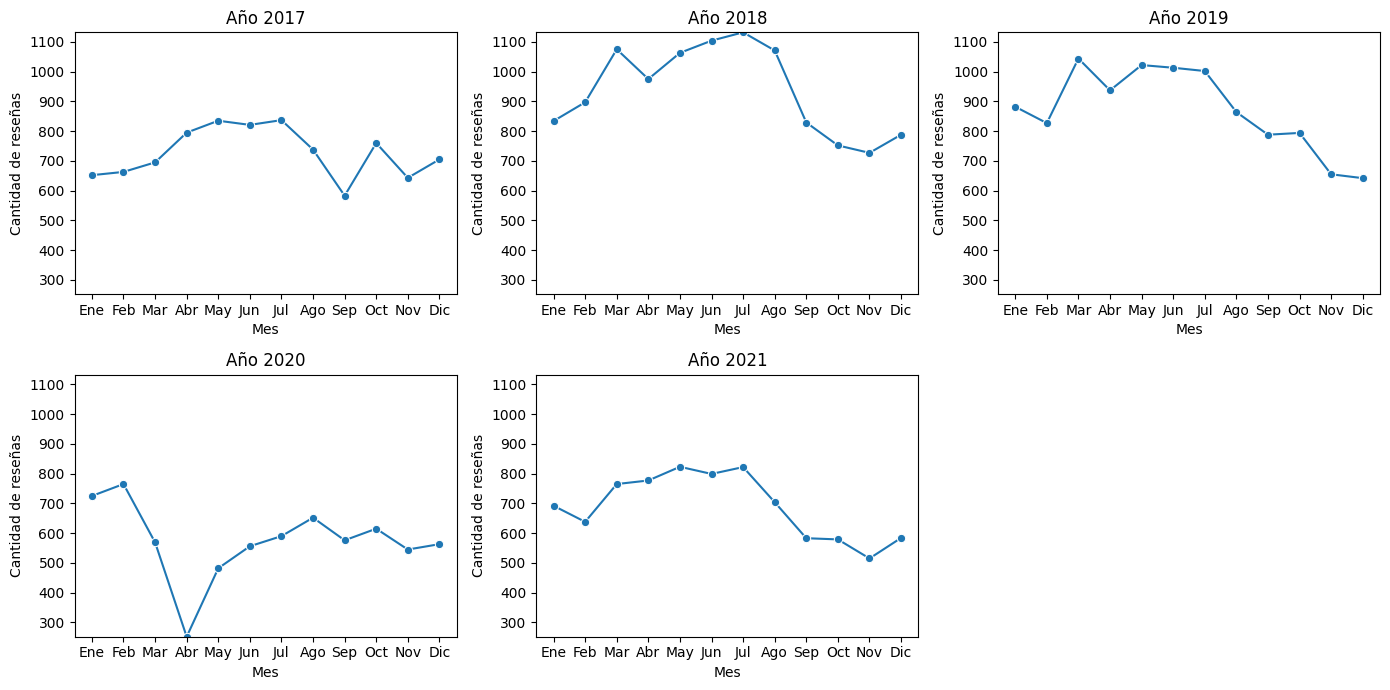

In [22]:
# Se extrae el año y mes de la columna de "fecha review".
df_review['fecha review'] = pd.to_datetime(df_review['fecha review'])
df_review['year'] = df_review['fecha review'].dt.year
df_review['month'] = df_review['fecha review'].dt.month

# Se agrupan las reseñas por año y mes, y se realiza un conteo de reseñas por mes.
data_mensual = df_review.groupby(['year', 'month']).size().reset_index(name='review_count')

# Se configuran los límites mínimos y máximos del eje y.
y_min = data_mensual['review_count'].min()
y_max = data_mensual['review_count'].max()

# Se ajusta el tamaño del gráfico.
plt.figure(figsize=(14, 7))

# Se itera sobre cada año y se crea el gráfico correspondiente a cada uno.
for i, year in enumerate(data_mensual['year'].unique(), start=1):
    # Se crean los subgráficos.
    plt.subplot(2, 3, i)  
    sns.lineplot(
        data=data_mensual[data_mensual['year'] == year], 
        x='month', 
        y='review_count', 
        marker='o'
    )
    plt.title(f'Año {year}')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad de reseñas')
    plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    # Se aplican límites constantes al eje y.
    plt.ylim(y_min, y_max)

# Se ajusta el diseño para asegurar que los gráficos no se sobrepongan.
plt.tight_layout()

En esta serie de gráficos de línea se contempla la progresión que se dió a lo largo de los años del del número de reseñas por mes. Se puede ver que el pico más alto de estos años se dió durante el año **2018**, teniendo éste un pico máximo de reseñas en el mes de **julio** con alrededor de **1100 reseñas** realizadas. Finalizando el año **2019** se puede distinguir el cominezo del impacto en la actividad a causa de la influencia de la pandemia por **COVID-19**, marcando un fuerte declive desde febrero hasta abril de **2020** y mostrando un ascenso de la actividad en agosto. Durante el trascurso de **2021** se muestra una regularización de la actividad pero se puede notar el impacto de la pandemia respecto a años anteriores a 2020.  
Como patrones regulares se observa de manera anual se muestra un incremento en la actividad durante los meses circundantes al verano, ya que en el mes de mayo se da una de las fechas patrias más importantes de México el dia 5 de mayo (La Batalla de Puebla) y, a su vez durante le mes de julio es una de las fechas patrias más importantes de Estados Unidos el día 4 de julio (Día de la Independencia). Y ya entrando a los meses fríos desde septiembre hasta febrero se puede notar un fuerte declive en la acividad.

## Marco espacial.

### Top 10 ciudades con mayor número de restaurantes.

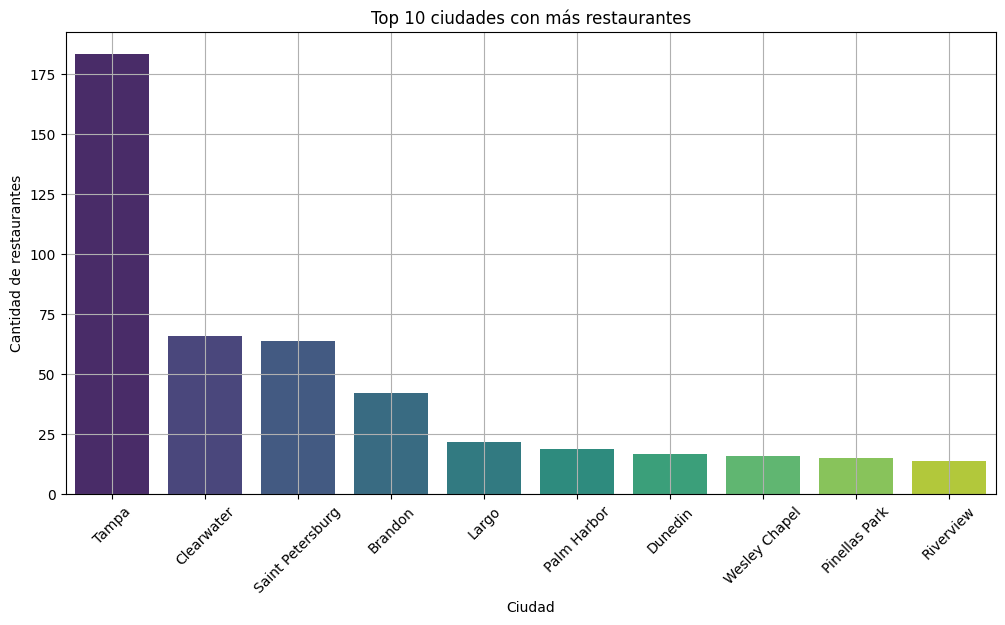

In [ ]:
# Se excluye el nombre "SD".
filtered_df = df_business[~((df_business['city'] == 'SD') )]

# Se cuentan los restaurantes por ciudad.
city_counts = filtered_df.groupby('city')['business_id'].nunique().reset_index(name='unique_business_ids')
city_counts = city_counts[city_counts['city'] != '']

# Se selecciona el top 10 ciudades con más restaurantes en orden descendente.
top_10_cities = city_counts.nlargest(10, 'unique_business_ids').sort_values(by='unique_business_ids', ascending=False)

# Se crea el histograma.
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_cities, x='city', y='unique_business_ids', palette='viridis')
plt.title('Top 10 ciudades con más restaurantes')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de restaurantes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Top lugares con mayor numero de reseñas

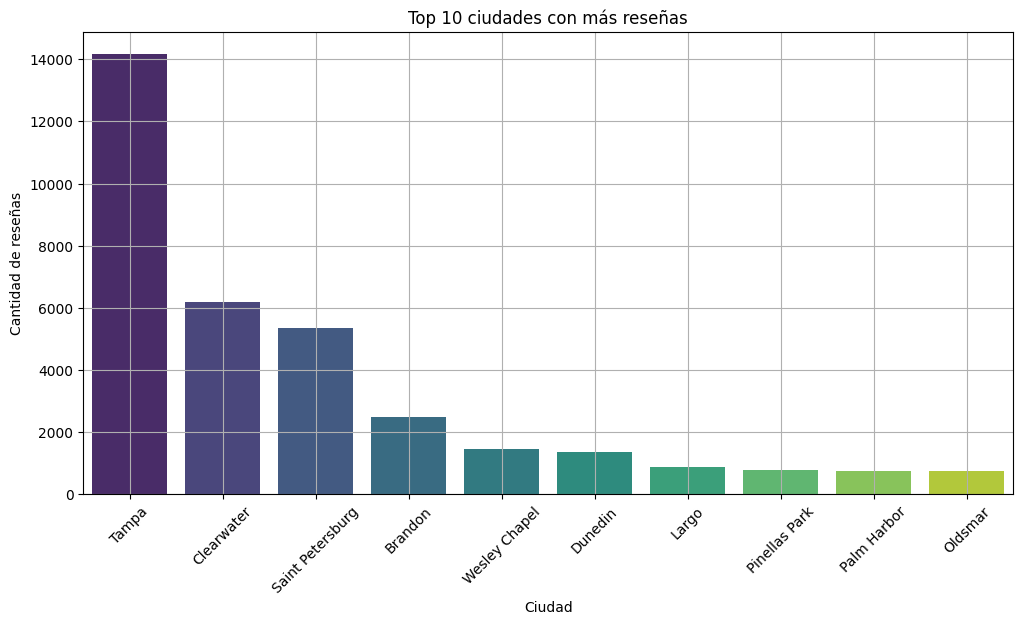

In [ ]:
# Se excluye el nombre "SD".
filtered_df = df_yelp[~((df_yelp['city'] == 'SD') )]

# Se cuentan los reseñas por ciudad.
city_counts = filtered_df.groupby('city')['review_id'].nunique().reset_index(name='unique_review_ids')
city_counts = city_counts[city_counts['city'] != '']

# Se selecciona el top 10 ciudades con más reseñas en orden descendente.
top_10_cities = city_counts.nlargest(10, 'unique_review_ids').sort_values(by='unique_review_ids', ascending=False)

# Se crea el histograma.
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_cities, x='city', y='unique_review_ids', palette='viridis')
plt.title('Top 10 ciudades con más reseñas')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de reseñas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()